# MACHINE LEARNING FOR CLASSIFICATION - FINAL ASSIGNMENT

#### Dataset

>https://www.kaggle.com/filippoo/deep-learning-az-ann/data

#### Context

>A bank is investigating a very high rate of customer leaving the bank

#### Task

>To predict if a customer will churn or not

## LOADING DATA

In [66]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Luca\OneDrive\Documenti\University\Master in Data Science\ML for Classification\Final Assignment\Churn_Modelling.csv',
                 sep = ',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
#df = df.sample(frac=0.4, random_state=42)

## PREPROCESSING DATA

#### Dropping unuseful columns (RowNumber, CustomerID and Surname)

In [68]:
df = df.drop(df.columns[0:3], axis=1)

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0
4684,623,France,Male,43,1,0.00,2,1,1,146379.30,0
1731,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0
4742,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0


#### Encoding Geography and Gender into Categorical Variables

In [70]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
df['Geography'] = Encoder.fit_transform(df['Geography'])

df['Gender'] = Encoder.fit_transform(df['Gender'])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,596,1,1,32,3,96709.07,2,0,0,41788.37,0
4684,623,0,1,43,1,0.00,2,1,1,146379.30,0
1731,601,2,0,44,4,0.00,2,1,0,58561.31,0
4742,506,1,1,59,8,119152.10,2,1,1,170679.74,0
4521,560,2,0,27,7,124995.98,1,1,1,114669.79,0


#### Isolating the dependent variable (Exited: If the customer has churned(1) or not(0)) from the independent ones

In [71]:
X = df.drop(df.columns[-1], axis = 1)
y = df.drop(df.columns[0:-1], axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79


In [72]:
y.head()

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


#### Splitting the model into Traning set (75%) and Test set (25%)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 3000 samples in the training dataset
There are 1000 samples in the testing dataset
Each sample has 10 features


#### Arranging all values of y, y_train and y_test into a one-coloumn array

In [74]:
y = y.iloc[:,0].values
y_train = y_train.iloc[:,0].values
y_test = y_test.iloc[:,0].values

## DECISION TREE

### Running a first Decision Tree

#### Defining and fitting the model

In [55]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.01, random_state = 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

#### Visualizing the first Decision Tree

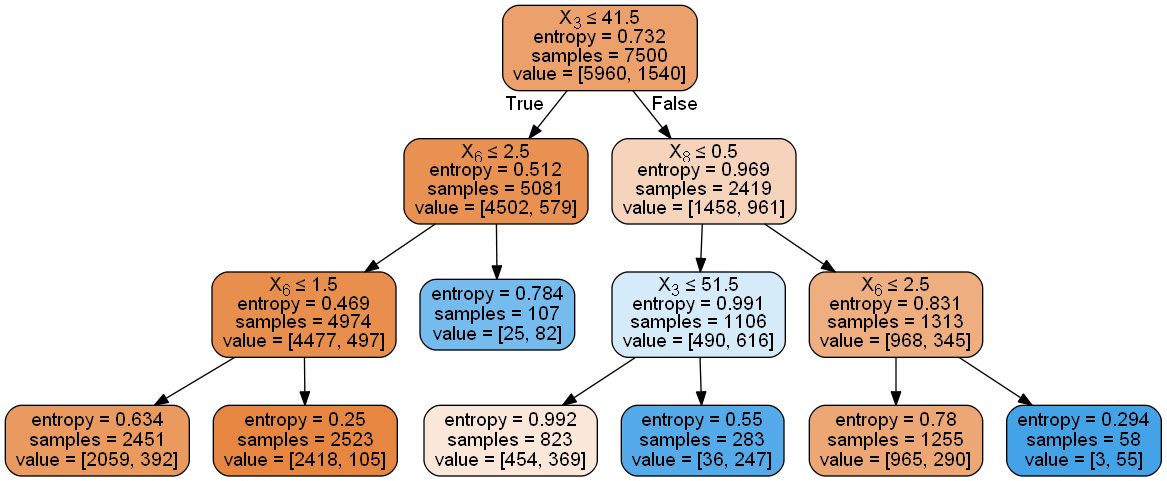

In [56]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Computing the score with Cross-Validation

In [57]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
average_accuracy = np.mean(scores) * 100
print("The average accuracy computed with Cross Validation is {0:.2f}%".format(average_accuracy))

The average accuracy computed with Cross Validation is 83.65%


### Using Elbow Method to parametrize the Decision Tree

#### Iterating on the best Minimum Impurity Decrease Parameter

In [58]:
avg_scores = []
parameter_values = np.arange(0,0.004, 0.0005)
for mid in parameter_values:
    model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42,
                                            min_impurity_decrease = mid)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    scores = np.mean(y_test == y_predicted) * 100
    avg_scores.append(round(np.mean(scores),4))

#### Visualizing the score of each iteration

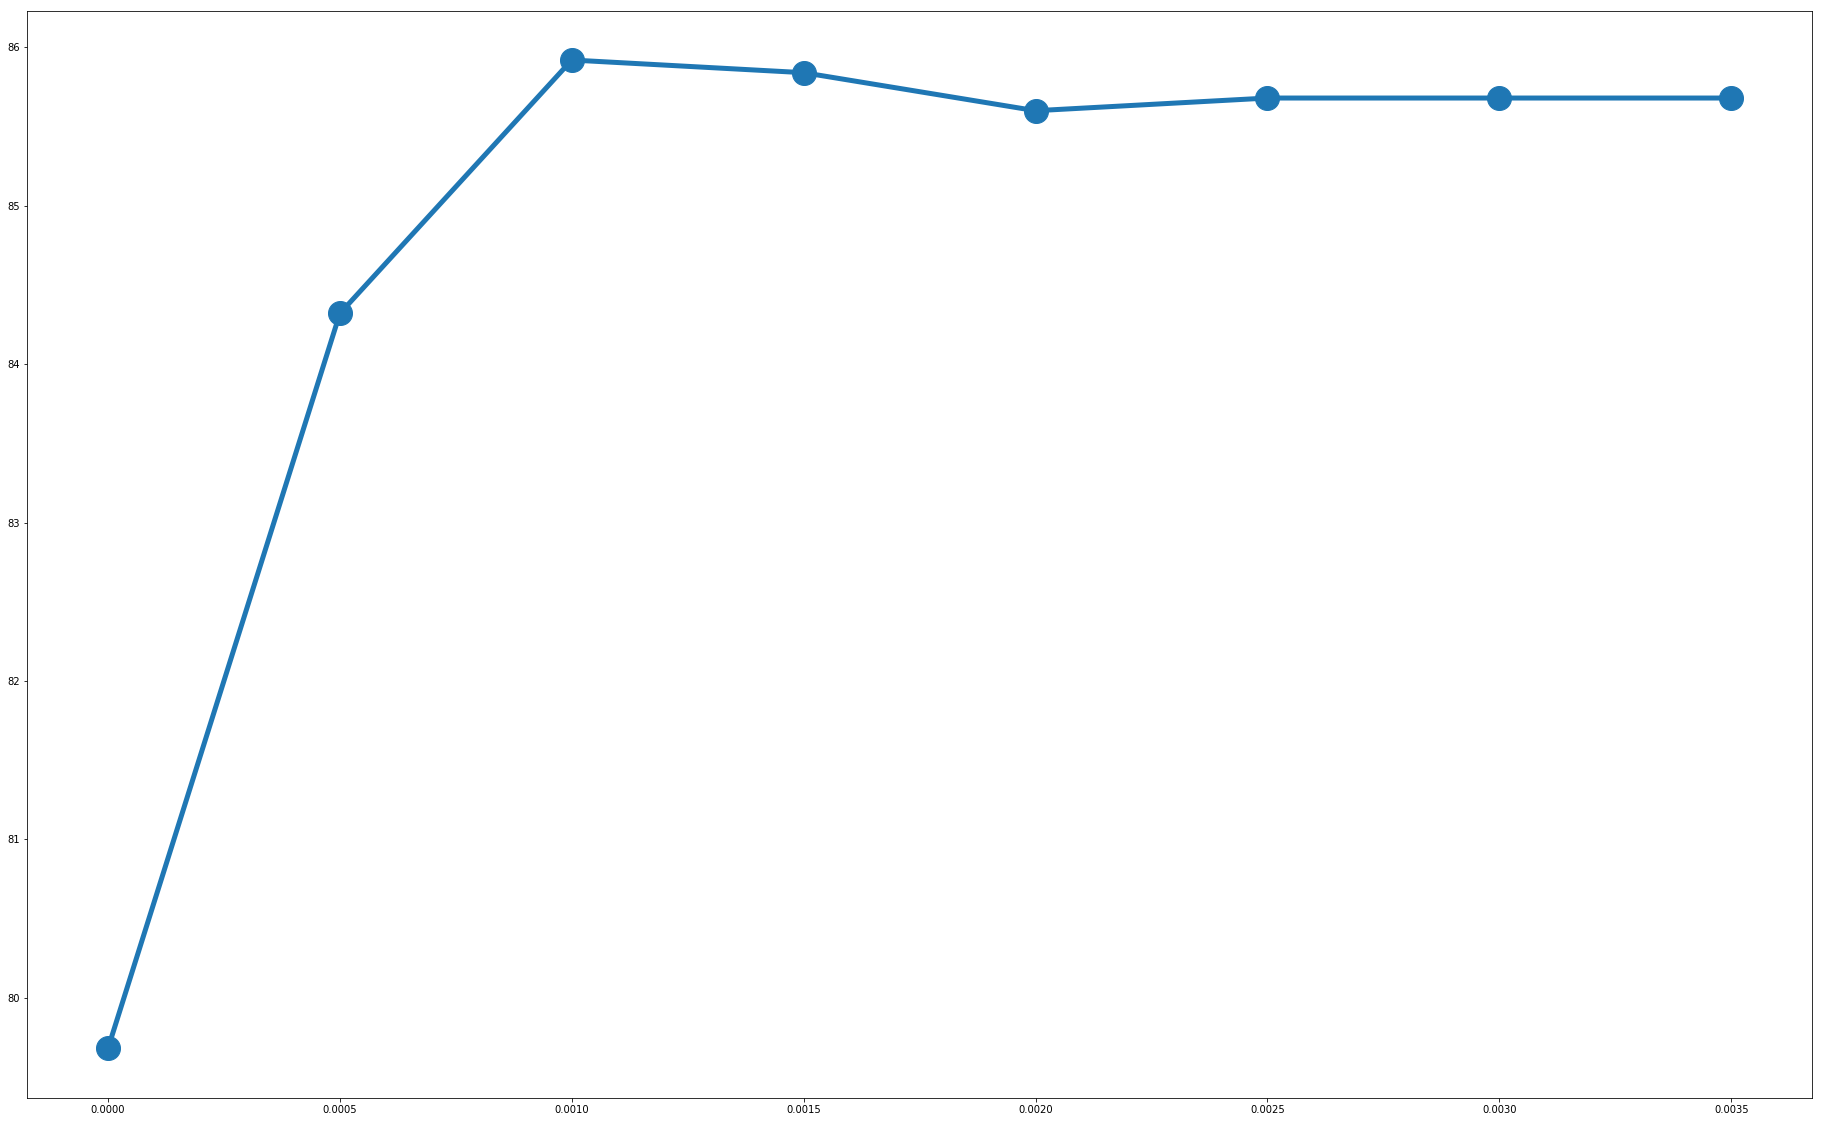

In [59]:
from matplotlib import pyplot as plt

plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.show()

In [60]:
print("The top accuracy is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]))
print("Obtained with min_impurity_decrease = {0:.4f}".format(parameter_values[np.argmax(avg_scores)]))

The top accuracy is 85.9%
Obtained with min_impurity_decrease = 0.0010


#### Computing the score with Cross-Validation

In [61]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
average_accuracy = np.mean(scores) * 100
print("The average accuracy computed with Cross Validation is {0:.1f}%".format(average_accuracy))

The average accuracy computed with Cross Validation is 85.3%


#### Visualizing the final tree

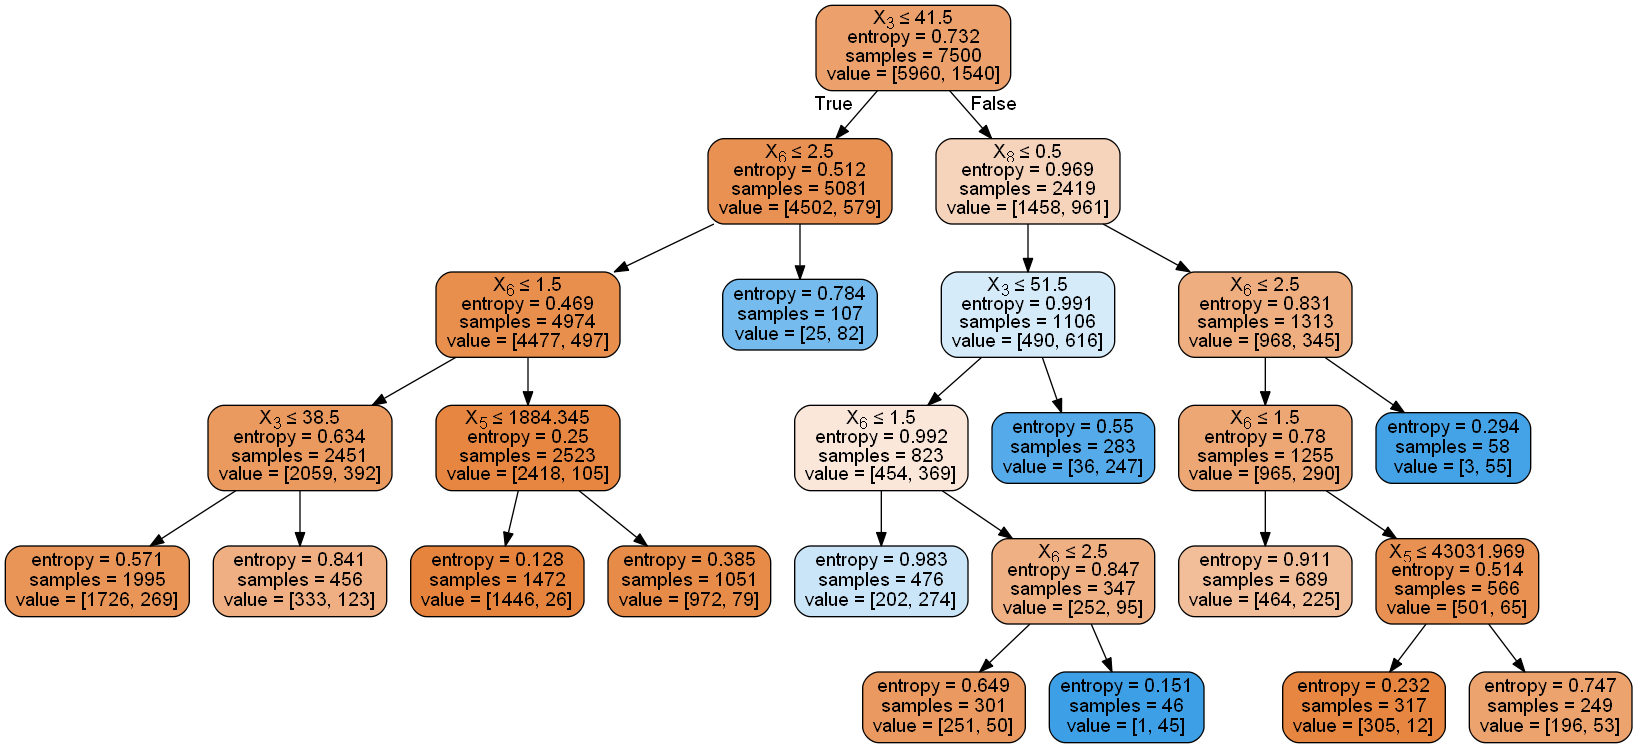

In [62]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## SUPPORT VECTOR MACHINE

Our task is to find the best kernel transformation by applying differnt kernels and the best sensivity to errors in the training phase parametrizing C and gamma

#### Fitting the model

In [75]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()
X = scaler.fit_transform(X)
model = svm.SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Computing the accuracy of the first model with Cross-Validation

In [76]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
average_accuracy = np.mean(scores) * 100
print("The average accuracy computed with Cross Validation is {0:.1f}%".format(average_accuracy))

The average accuracy computed with Cross Validation is 79.8%


### Searching for the best Kernel

I am iterating on the 

In [77]:
models = (svm.SVC(kernel='linear', C=1, gamma=1),
          svm.SVC(kernel='rbf', gamma=1, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=1, coef0=1),
          svm.SVC(kernel='poly', degree=1, gamma=1, coef0=1, C=1))

for idx,model in enumerate(models):
    model.fit(X_train,y_train)
    tr_acc = model.score(X_train,y_train)*100
    ts_acc = model.score(X_test,y_test)*100
    print("Model:%d, Train set accuracy:%.2f%%, Test set Accuracy:%.2f%%"%(idx+1,tr_acc,ts_acc))

Model:1, Train set accuracy:79.03%, Test set Accuracy:77.60%
Model:2, Train set accuracy:100.00%, Test set Accuracy:78.20%
Model:3, Train set accuracy:80.27%, Test set Accuracy:78.20%
Model:4, Train set accuracy:78.80%, Test set Accuracy:77.40%


I choose the Radial Basis Function kernel because is the best both in Train and Test accuracy

### Parametrization of the model through Grid-Search

The best parameters for RBF are {'C': 32.0, 'gamma': 1.0000000000000001e-09} with a Cross-Validation accuracy of 80.30%


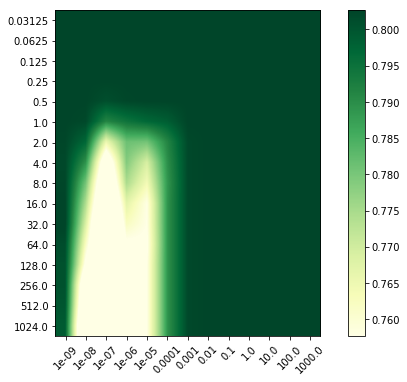

In [78]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.colors as colors
import matplotlib.pyplot as plt

C_range = np.logspace(-5, 10, 16, base=2)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("The best parameters for RBF are %s with a Cross-Validation accuracy of %.2f%%"% (grid.best_params_, grid.best_score_*100))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))

f, ax = plt.subplots(1, 1, figsize=(10,6))
plt.imshow(scores, interpolation='bilinear', cmap=plt.cm.YlGn, vmin=np.percentile(scores,10), vmax=np.percentile(scores,90))
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.colorbar()
plt.show()

#### Computing the accuracy of the final model with Cross-Validation

In [80]:
model=svm.SVC(kernel='rbf', C=32, gamma=1.0000000000000001e-09)
scores = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
average_accuracy = np.mean(scores) * 100
print("The average accuracy computed with Cross Validation is {0:.1f}%".format(average_accuracy))

The average accuracy computed with Cross Validation is 79.8%


## ARTIFICIAL NEURAL NETWORK

#### Defining the model

I'm applying a simple ANN 

In [63]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.optimizers import Adam

#Defining the type of model (Sequential) and the the first layer. In the first layer, due to the low number of dimensions,
    #I decided not to reduce the number of neurons and just recombine them

model = Sequential()
model.add(Dense(10,input_dim=10))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#In the second hidden layer the number of neurons will be reduce from 10 to 6

model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Finally in the last layer we have just one neurons having a binary classification task

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#### Fitting the model

In [64]:
model.fit(X_train, y_train, epochs=100, batch_size=10,  verbose=2)
score = model.evaluate(X_test, y_test) 

Epoch 1/100
 - 1s - loss: 9.2245 - acc: 0.3785
Epoch 2/100
 - 1s - loss: 8.7757 - acc: 0.4047
Epoch 3/100
 - 1s - loss: 8.6001 - acc: 0.4107
Epoch 4/100
 - 1s - loss: 8.5949 - acc: 0.4097
Epoch 5/100
 - 1s - loss: 8.3895 - acc: 0.4232
Epoch 6/100
 - 1s - loss: 7.8172 - acc: 0.4560
Epoch 7/100
 - 1s - loss: 7.9229 - acc: 0.4497
Epoch 8/100
 - 1s - loss: 7.7404 - acc: 0.4632
Epoch 9/100
 - 1s - loss: 7.7937 - acc: 0.4580
Epoch 10/100
 - 1s - loss: 7.4950 - acc: 0.4793
Epoch 11/100
 - 1s - loss: 7.3897 - acc: 0.4783
Epoch 12/100
 - 1s - loss: 7.1176 - acc: 0.4993
Epoch 13/100
 - 1s - loss: 6.8739 - acc: 0.5127
Epoch 14/100
 - 1s - loss: 6.7361 - acc: 0.5208
Epoch 15/100
 - 1s - loss: 6.3259 - acc: 0.5408
Epoch 16/100
 - 1s - loss: 6.3630 - acc: 0.5369
Epoch 17/100
 - 1s - loss: 5.7689 - acc: 0.5716
Epoch 18/100
 - 1s - loss: 5.6029 - acc: 0.5771
Epoch 19/100
 - 1s - loss: 5.2311 - acc: 0.6017
Epoch 20/100
 - 1s - loss: 5.1519 - acc: 0.6036
Epoch 21/100
 - 1s - loss: 5.1641 - acc: 0.6059
E

#### Computing the accuracy in the Test Set

In [65]:
print("The accuracy on test set is {0:.2f}%".format(score[1]*100))

The accuracy on test set is 80.12%


## FINAL CONSIDERATIONS

The best algorithm we've found is a Decision Tree (85,3% accuracy with Cross-Validation)

###### Notes

>1. SVM models have been trained and tested on a sampled (40%) dataset while ANN model has been trained and tested on the entire     dataset

>2. The accuracy of ANN model has been computed on the Test set instead of Cross-Validation

###### Luca Pedretti